<a href="https://colab.research.google.com/github/xohit/python-cimec-2025-Mohit-Jaiswal/blob/main/python_cimec_Mohit_Jaiswal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hi Luigi! Thanks for the entertaining and useful summer lessons. I am relatively a beginner, especially with Python, so I feel like I learned a fair bit to go ahead and use it for my work in the future.

For the (mini) project, I am keeping it fairly simple. I will try to work on my previous internship work, studying territorial aggression in mice, and understanding the behavioral and neural basis of it. One aspect of that work was trying to isolate the behavioral criteria (like climbing, attacking, freezing, etc.) and how transitions across such states occur in the context of territorial hierarchy. So, essentially, I tried to design a behavioral transition matrix, mostly on pen and paper, to better predict upcoming behavior, which eventually helped us with better pose estimation (DeepLabCut and SimBA) analysis.

In [24]:
import numpy as np

#Defining the behavioral parameters
behaviors = ['S', 'M', 'G', 'X', 'A', 'R', 'F', 'C'] #Sniffing, mounting, grooming, exploration, attacking, rattling, flight, climbing

#I don't have access to my original data files at this moment, so I will provide an example of observed sequence of behaviors
sequence = ['X', 'S', 'G', 'X', 'S', 'X', 'G', 'A', 'F', 'R', 'X', 'S', 'M', 'A', 'F', 'C', 'R', 'S', 'F']

#Now I want to count the number of times each behavior occurs, and initialize a count matrix
counts = {b1: {b2: 0 for b2 in behaviors} for b1 in behaviors}

#Now, I wamt tp count the transitions in my example sequence
for (b1, b2) in zip(sequence, sequence[1:]):
  counts[b1][b2] += 1

#Now, I should have the counts, which I want to convert to a matrix
count_matrix = np.array([[counts[b1][b2] for b2 in behaviors] for b1 in behaviors])

#My agenda is to try and calculate the probability of transitions between two given states
#So, to get the transition probability matrix, I would normalize by dividing the sum of the rows of the count matrix
row_sums = count_matrix.sum(axis=1, keepdims=True)
transition_matrix = count_matrix / row_sums

print("Transition Probability Matrix:")
print(transition_matrix)

Transition Probability Matrix:
[[0.   0.25 0.25 0.25 0.   0.   0.25 0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.5  0.5  0.   0.   0.  ]
 [0.75 0.   0.25 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.5  0.   0.   0.5  0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.5  0.   0.5 ]
 [0.   0.   0.   0.   0.   1.   0.   0.  ]]


I want to visualize it better, so I am gonna do a heatmap, using the SeaBorn library.

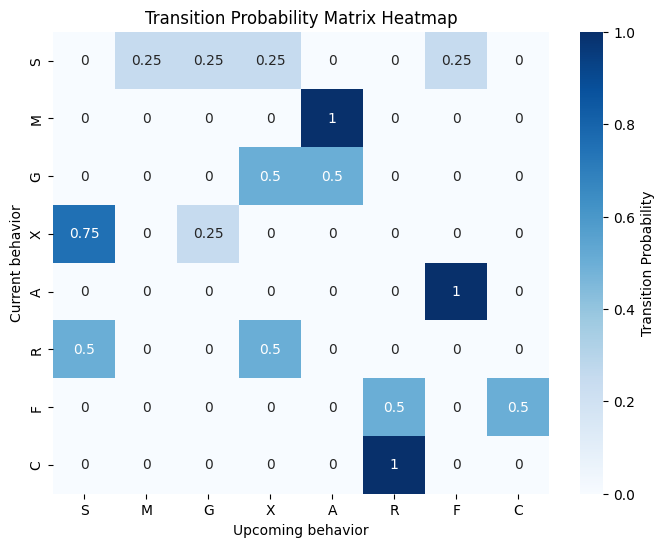

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

#Creating the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(transition_matrix, annot=True, cmap='Blues', xticklabels=behaviors, yticklabels=behaviors, cbar_kws={'label': 'Transition Probability'})

#Annotating the heatmap
plt.title('Transition Probability Matrix Heatmap')
plt.xlabel('Upcoming behavior')
plt.ylabel('Current behavior')
plt.show()

Now, even though this is very straightforward and simple - literature also does network analysis of such behavioral dynamics. I also wanted to explore further and do a transition probability network.

I needed help with this, especially which library to implement and how it works. So, StackOverflow and Gemini came to the rescue!

In [25]:
pip install networkx matplotlib

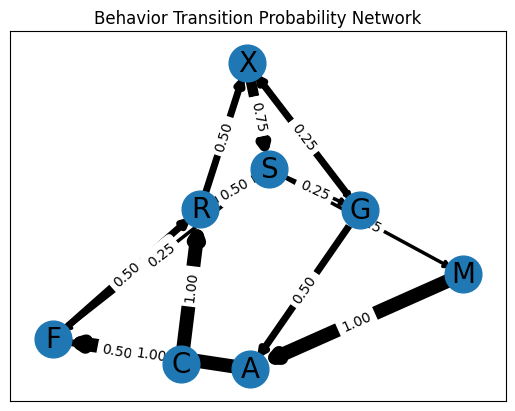

In [30]:
import networkx as nx

#I want to create a directed graph with weighted edges which will give you the visual information
#of the transition between states ('from' ----> 'to'), and the probability dictating the weights,
#i.e the thickness of the edges

#Creating a directed graph
DG = nx.DiGraph()

#Constructing the edges with weights, where each node is each of the behavioral parameter
for i, behavior_from in enumerate(behaviors):
  for j, behavior_to in enumerate(behaviors):
    if transition_matrix[i, j] > 0:
      DG.add_edge(behavior_from, behavior_to, weight=transition_matrix[i, j])

#Drawing the graph
pos = nx.spring_layout(DG)
edges = DG.edges(data=True)

#drawing the nodes
nx.draw_networkx_nodes(DG, pos, node_size=700)

#drawing edges with thickness proportional to the probabilities
nx.draw_networkx_edges(DG, pos, edgelist=edges, width=[d['weight'] * 10 for (u, v, d) in edges])

#drawing the labels
nx.draw_networkx_labels(DG, pos, font_size=20, font_family="sans-serif")

#drawing edge labels (transition probabilities)
edge_labels = {(u, v): f"{d['weight']:.2f}" for (u, v, d) in edges}
nx.draw_networkx_edge_labels(DG, pos, edge_labels=edge_labels)

#plotting the network
plt.title("Behavior Transition Probability Network")
plt.show()

Just based on this diagram for this synthetic data, it informs us that states like mounting and attack can be key (*i.e, mounting is almost always followed by a display of attack*); also climbing/surrendering behavior is almost always accompanied with rattling of the tail, showing subordination.

Therefore, such behavioral transition matrices and network plots can serve as useful tools to proceed with further behavioral assays, and advanced analysis, at least in the context of my experiment there.

**Side note:** *I did end up plotting the transition matrices for 7 batches of behavioral experiments during my time there (although, running this Python pipeline would have been much more efficient and saved me some time!). This helped us to focus on key behavioral states, instead of all of them, which also allowed us to streamline the SimBA (Simple Behavioral Analysis) ann DLC analysis, because too many behaviors to score and mark introduced bottlenecks.*